In [1]:
import os
import pandas as pd
from google.cloud import bigquery
import db_dtypes

#scenic-outcome-453219-h5-4c318c9a7175
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="scenic-outcome-453219-h5-4c318c9a7175.json"
client = bigquery.Client() 

pd.set_option('display.max_columns', None)  # wyłącz limit na kolumny
pd.set_option('display.max_rows', None)  # wyłącz limit na wiersze
pd.set_option('display.width', None)  # wyłącz limit na szerokość
pd.set_option('display.max_colwidth', None)  # wyłącz limit na szerokość kolumn

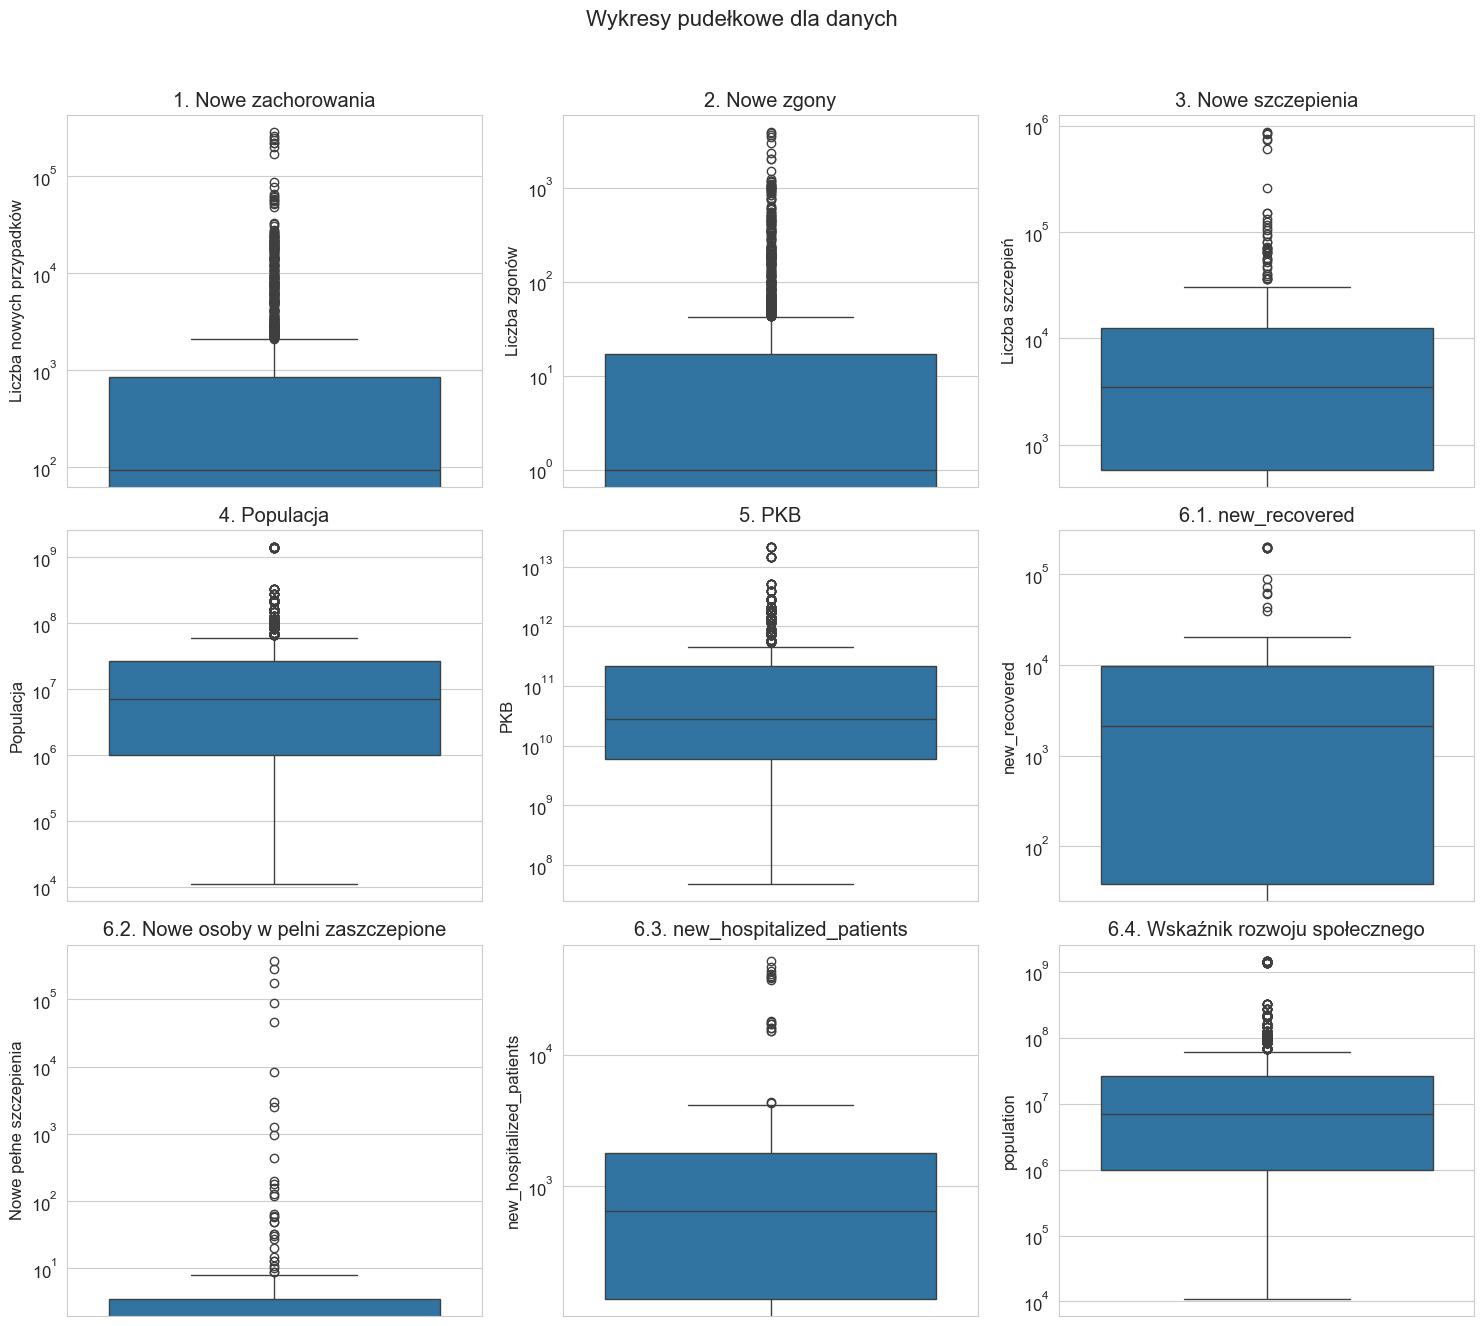

In [28]:
#1
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("6.0_combined_covid_world_gdp_data.csv")

df['date'] = pd.to_datetime(df['date'])
# print(df['date'].unique())  # Sprawdzenie unikalnych dat
df = df[(df['date'] >= '2021-01-01') & (df['date'] <= '2021-01-08')] # Zakres dat

# Konwersja daty na format dzień-miesiąc dla lepszej czytelności na wykresach
df['date'] = pd.to_datetime(df['date']).dt.strftime('%d-%m')

# Konfiguracja wykresów
plt.figure(figsize=(15, 13))
sns.set_style("whitegrid")
plt.suptitle("Wykresy pudełkowe dla danych", y=1.02, fontsize=16)
plt.rcParams.update({'font.size': 12})

#1. Liczba nowych zachorowań
plt.subplot(3, 3, 1)
sns.boxplot(y='new_confirmed_x', data=df)
plt.title('1. Nowe zachorowania')
plt.xticks(rotation=45)
plt.ylabel('Liczba nowych przypadków')
plt.yscale('log')

# 2. Liczba nowych zgonów
plt.subplot(3, 3, 2)
sns.boxplot(y='new_deceased', data=df)
plt.title('2. Nowe zgony')
plt.xticks(rotation=45)
plt.ylabel('Liczba zgonów')
plt.yscale('log')

# 3. Liczba nowych szczepień
plt.subplot(3, 3, 3)
sns.boxplot(y='new_persons_vaccinated', data=df)
plt.title('3. Nowe szczepienia')
plt.xticks(rotation=45)
plt.ylabel('Liczba szczepień')
plt.yscale('log')

# 4. Populacja
plt.subplot(3, 3, 4)
sns.boxplot(y='population', data=df)
plt.title('4. Populacja')
plt.xticks(rotation=45)
plt.ylabel('Populacja')
plt.yscale('log')

# 5. PKB
plt.subplot(3, 3, 5)
sns.boxplot(y='gdp_usd', data=df)
plt.title('5. PKB')
plt.xticks(rotation=45)
plt.ylabel('PKB')
plt.yscale('log')

# 6.1.
plt.subplot(3, 3, 6)
sns.boxplot(y='new_recovered', data=df)
plt.title('6.1. new_recovered')
plt.xticks(rotation=45)
plt.ylabel('new_recovered')
plt.yscale('log')

# 6.2. Nowe osoby w pelni zaszczepione
plt.subplot(3, 3, 7)
sns.boxplot(y='new_persons_fully_vaccinated', data=df)
plt.title('6.2. Nowe osoby w pelni zaszczepione')
plt.xticks(rotation=45)
plt.ylabel('Nowe pełne szczepienia')
plt.yscale('log')

# 6.3.
plt.subplot(3, 3, 8)
sns.boxplot(y='new_hospitalized_patients', data=df)
plt.title('6.3. new_hospitalized_patients')
plt.xticks(rotation=45)
plt.ylabel('new_hospitalized_patients')
plt.yscale('log')

# 6.4. Wskaźnik population
plt.subplot(3, 3, 9)
sns.boxplot(y='population', data=df)
plt.title('6.4. Wskaźnik rozwoju społecznego')
plt.xticks(rotation=45)
plt.ylabel('population')
plt.yscale('log')

plt.tight_layout()
plt.show()

# location_key,date,country_code,country_name,new_confirmed_x,cumulative_confirmed,new_tested,cumulative_tested,new_recovered,new_hospitalized_patients,new_deceased,cumulative_deceased,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_confirmed_y,stringency_index,population,population_male,population_female,population_density,human_development_index,gdp_usd,gdp_per_capita_usd,life_expectancy,year,Rank,CCA3,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (kmÂ²),Density (per kmÂ²),Growth Rate,World Population Percentage

In [78]:
#2
import numpy as np
#2.1 Metoda IQR (dla zmiennej new_confirmed - nowe zachorowania)
# Obliczanie IQR dla new_confirmed
Q1 = df['new_confirmed'].quantile(0.25)
Q3 = df['new_confirmed'].quantile(0.75)
IQR = Q3 - Q1

# Definiowanie granic dla outlierów
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrowanie danych bez outlierów
df_iqr = df[(df['new_confirmed'] >= lower_bound) & (df['new_confirmed'] <= upper_bound)]

print(f"Usunięto {len(df) - len(df_iqr)} outlierów metodą IQR dla new_confirmed")
print(f"Originalny zakres: {df['new_confirmed'].min()} - {df['new_confirmed'].max()}")
print(f"Po usunięciu outlierów: {df_iqr['new_confirmed'].min()} - {df_iqr['new_confirmed'].max()}")
#Metoda IQR jest odporna na ekstremalne wartości i dobrze sprawdza się dla danych o rozkładzie nie-normalnym, jak dane o zachorowaniach.

#2.2 Metoda Z-Score (dla zmiennej new_deceased - nowe zgony)
from scipy import stats

# Obliczanie Z-Score
df['z_score'] = np.abs(stats.zscore(df['new_deceased']))

# Definiowanie progu (typowo 2 lub 3)
threshold = 2.5

# Filtrowanie danych bez outlierów
df_zscore = df[df['z_score'] < threshold]

print(f"\nUsunięto {len(df) - len(df_zscore)} outlierów metodą Z-Score dla new_deceased")
print(f"Originalny zakres: {df['new_deceased'].min()} - {df['new_deceased'].max()}")
print(f"Po usunięciu outlierów: {df_zscore['new_deceased'].min()} - {df_zscore['new_deceased'].max()}")
#Z-Score lepiej sprawdza się dla danych, które są mniej więcej normalnie rozłożone, a zgony często mają taki charakter rozkładu.

Usunięto 1524 outlierów metodą IQR dla new_confirmed
Originalny zakres: 59 - 14151
Po usunięciu outlierów: 59 - 1453

Usunięto 1588 outlierów metodą Z-Score dla new_deceased
Originalny zakres: 0 - 553
Po usunięciu outlierów: <NA> - <NA>


(46742, 99)
  country_code_iso_3 country_name          1960          1961          1962  \
0                ABW        Aruba           NaN           NaN           NaN   
1                AFG  Afghanistan  5.377778e+08  5.488889e+08  5.466667e+08   
2                AFG  Afghanistan  5.377778e+08  5.488889e+08  5.466667e+08   
3                AFG  Afghanistan  5.377778e+08  5.488889e+08  5.466667e+08   
4                AFG  Afghanistan  5.377778e+08  5.488889e+08  5.466667e+08   

           1963          1964          1965          1966          1967  ...  \
0           NaN           NaN           NaN           NaN           NaN  ...   
1  7.511112e+08  8.000000e+08  1.006667e+09  1.400000e+09  1.673333e+09  ...   
2  7.511112e+08  8.000000e+08  1.006667e+09  1.400000e+09  1.673333e+09  ...   
3  7.511112e+08  8.000000e+08  1.006667e+09  1.400000e+09  1.673333e+09  ...   
4  7.511112e+08  8.000000e+08  1.006667e+09  1.400000e+09  1.673333e+09  ...   

   cumulative_deceased  new_pers

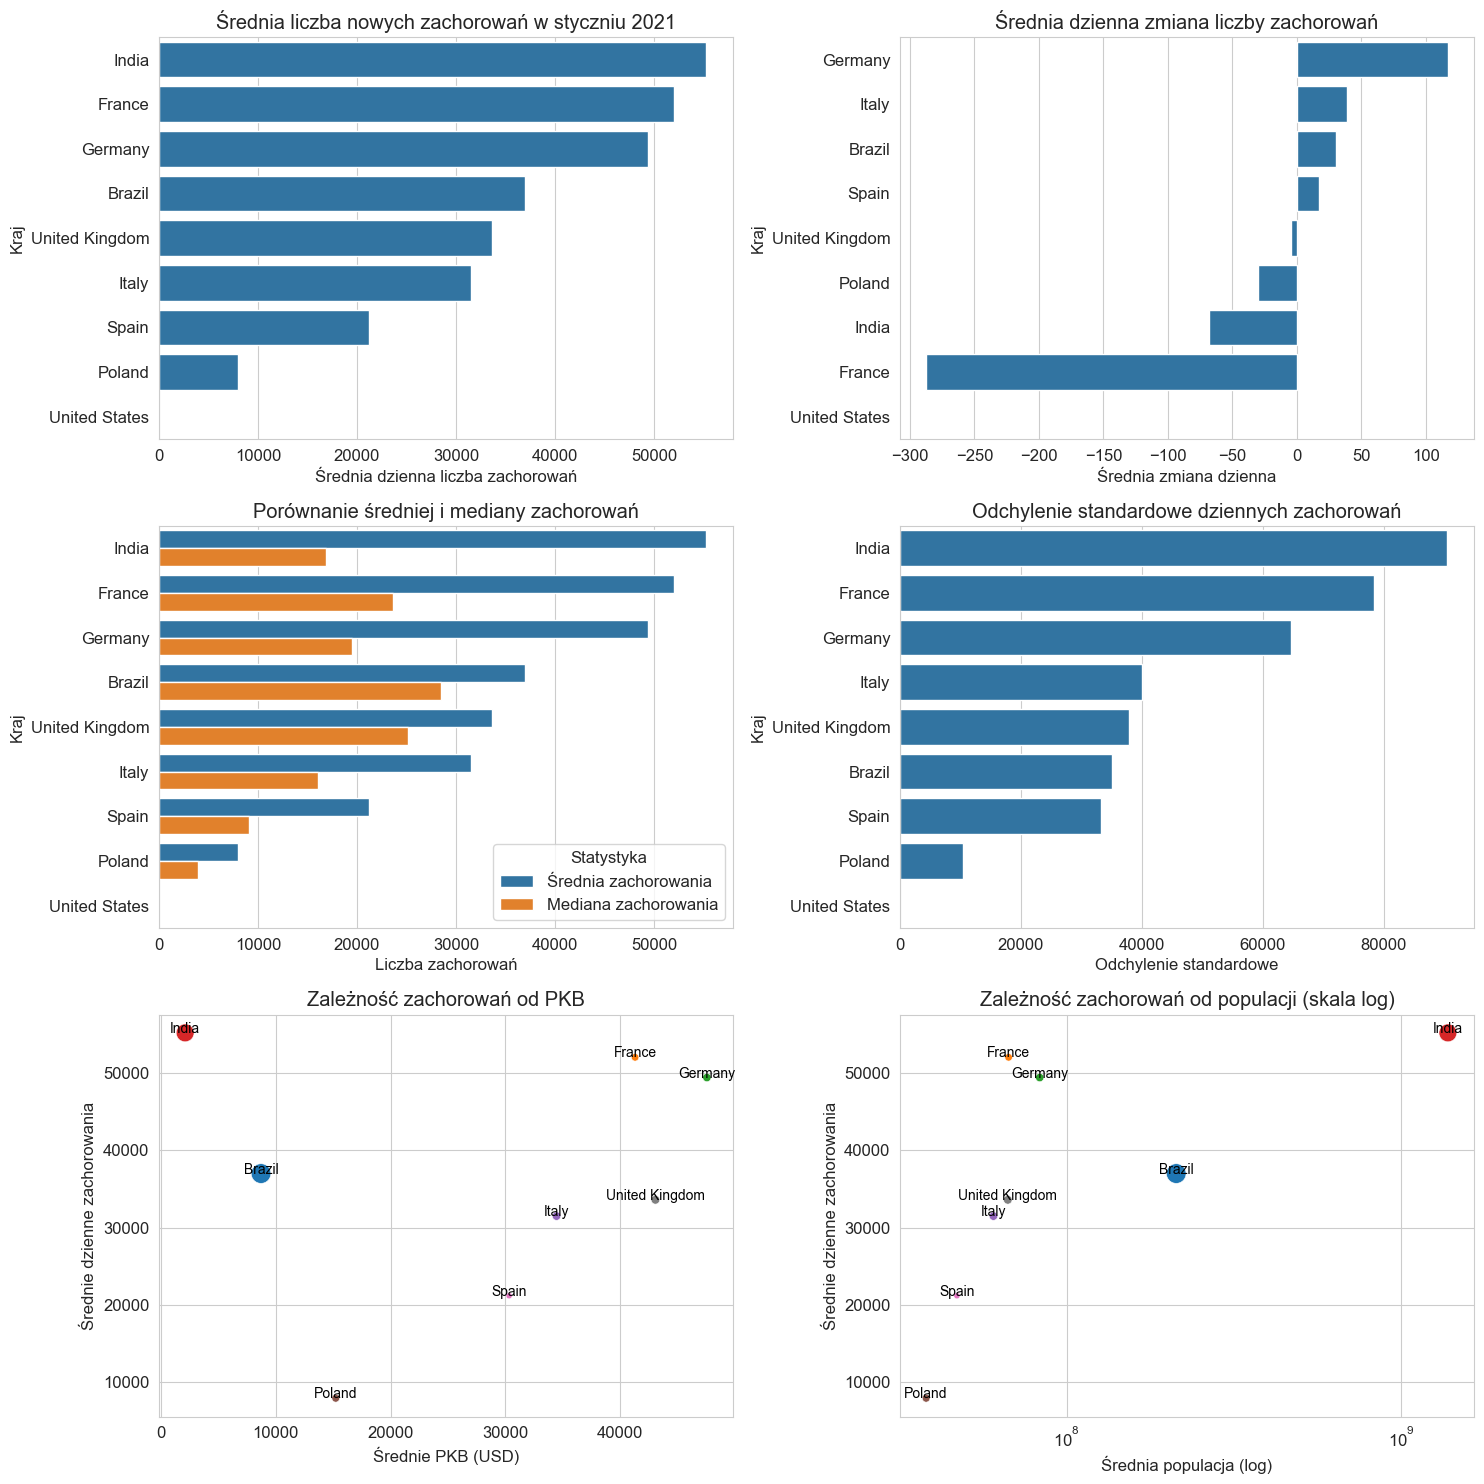

In [22]:
#3
df = pd.read_csv("poziom1.csv")

selected_countries = ['United States', 'India', 'Brazil', 'Russia', 'United Kingdom',
                     'France', 'Germany', 'Italy', 'Spain', 'Poland']

print(df.shape)
print(df.head())

# (df['date'] >= '2021-01-01') &
#         (df['date'] <= '2021-01-31') &

df = df[
        df['country_name'].isin(selected_countries)
]

# Obliczenia statystyczne
# 3.1 Średnie wartości
mean_stats = df.groupby('country_name')[['new_confirmed', 'new_deceased', 'new_persons_vaccinated']].mean().reset_index()
mean_stats.columns = ['Country', 'Średnia zachorowania', 'Średnia zgony', 'Średnia szczepienia']

# 3.2 Średnia zmiana wartości (dzienna)
change_stats = df.groupby('country_name')[['new_confirmed', 'new_deceased', 'new_persons_vaccinated']].diff().groupby(df['country_name']).mean().reset_index()
change_stats.columns = ['Country', 'Średnia zmiana zachorowania', 'Średnia zmiana zgonów', 'Średnia zmiana szczepień']

# 3.3 Mediana
median_stats = df.groupby('country_name')[['new_confirmed', 'new_deceased', 'new_persons_vaccinated']].median().reset_index()
median_stats.columns = ['Country', 'Mediana zachorowania', 'Mediana zgony', 'Mediana szczepienia']

# 3.4 Odchylenie standardowe
std_stats = df.groupby('country_name')[['new_confirmed', 'new_deceased', 'new_persons_vaccinated']].std().reset_index()
std_stats.columns = ['Country', 'Odchylenie zachorowania', 'Odchylenie zgony', 'Odchylenie szczepienia']

# 3.5 Statystyki z PKB
gdp_stats = df.groupby('country_name').agg({
    'new_confirmed': ['min', 'mean', 'max'],
    'new_deceased': ['min', 'mean', 'max'],
    'new_persons_vaccinated': ['min', 'mean', 'max'],
    'gdp_per_capita_usd': 'mean'
}).reset_index()
gdp_stats.columns = ['Country', 'Min zachorowania', 'Śr zachorowania', 'Max zachorowania',
                    'Min zgony', 'Śr zgony', 'Max zgony',
                    'Min szczepienia', 'Śr szczepienia', 'Max szczepienia',
                    'Śr PKB']

# 3.6 Statystyki z populacją
pop_stats = df.groupby('country_name').agg({
    'new_confirmed': ['min', 'mean', 'max'],
    'new_deceased': ['min', 'mean', 'max'],
    'new_persons_vaccinated': ['min', 'mean', 'max'],
    'population': 'mean'
}).reset_index()
pop_stats.columns = ['Country', 'Min zachorowania', 'Śr zachorowania', 'Max zachorowania',
                    'Min zgony', 'Śr zgony', 'Max zgony',
                    'Min szczepienia', 'Śr szczepienia', 'Max szczepienia',
                    'Śr populacja']

# Wizualizacje
plt.figure(figsize=(15, 15))
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# 3.1 Wykres średnich zachorowań
plt.subplot(3, 2, 1)
sns.barplot(x='Średnia zachorowania', y='Country', data=mean_stats.sort_values('Średnia zachorowania', ascending=False))
plt.title('Średnia liczba nowych zachorowań w styczniu 2021')
plt.xlabel('Średnia dzienna liczba zachorowań')
plt.ylabel('Kraj')

# 3.2 Wykres średnich zmian (przyrostów dziennych)
plt.subplot(3, 2, 2)
sns.barplot(x='Średnia zmiana zachorowania', y='Country',
           data=change_stats.sort_values('Średnia zmiana zachorowania', ascending=False))
plt.title('Średnia dzienna zmiana liczby zachorowań')
plt.xlabel('Średnia zmiana dzienna')
plt.ylabel('Kraj')

# 3.3 Porównanie średniej i mediany
plt.subplot(3, 2, 3)
mean_median = pd.melt(mean_stats.merge(median_stats, on='Country'),
                     id_vars=['Country'],
                     value_vars=['Średnia zachorowania', 'Mediana zachorowania'],
                     var_name='Statystyka', value_name='Wartość')
sns.barplot(x='Wartość', y='Country', hue='Statystyka',
           data=mean_median.sort_values('Wartość', ascending=False))
plt.title('Porównanie średniej i mediany zachorowań')
plt.xlabel('Liczba zachorowań')
plt.ylabel('Kraj')

# 3.4 Odchylenie standardowe
plt.subplot(3, 2, 4)
sns.barplot(x='Odchylenie zachorowania', y='Country',
           data=std_stats.sort_values('Odchylenie zachorowania', ascending=False))
plt.title('Odchylenie standardowe dziennych zachorowań')
plt.xlabel('Odchylenie standardowe')
plt.ylabel('Kraj')

# 3.5 Zależność od PKB
plt.subplot(3, 2, 5)
sns.scatterplot(x='Śr PKB', y='Śr zachorowania', size='Śr zgony', hue='Country',
               data=gdp_stats, sizes=(20, 200), legend=False)
plt.title('Zależność zachorowań od PKB')
plt.xlabel('Średnie PKB (USD)')
plt.ylabel('Średnie dzienne zachorowania')
for line in range(0, gdp_stats.shape[0]):
    plt.text(gdp_stats['Śr PKB'][line], gdp_stats['Śr zachorowania'][line],
            gdp_stats['Country'][line], horizontalalignment='center',
            size='small', color='black')

# 3.6 Zależność od populacji
plt.subplot(3, 2, 6)
sns.scatterplot(x='Śr populacja', y='Śr zachorowania', size='Śr zgony', hue='Country',
               data=pop_stats, sizes=(20, 200), legend=False)
plt.xscale('log')
plt.title('Zależność zachorowań od populacji (skala log)')
plt.xlabel('Średnia populacja (log)')
plt.ylabel('Średnie dzienne zachorowania')
for line in range(0, pop_stats.shape[0]):
    plt.text(pop_stats['Śr populacja'][line], pop_stats['Śr zachorowania'][line],
            pop_stats['Country'][line], horizontalalignment='center',
            size='small', color='black')

plt.tight_layout()
plt.show()

# # Analiza wyników
# print("\nPodsumowanie statystyczne:")
# print(f"1. Kraj z najwyższą średnią zachorowań: {mean_stats.loc[mean_stats['Średnia zachorowania'].idxmax(), 'Country']}")
# print(f"2. Kraj z najniższym odchyleniem standardowym: {std_stats.loc[std_stats['Odchylenie zachorowania'].idxmin(), 'Country']}")
# print(f"3. Największa różnica między średnią a medianą: {mean_median.groupby('Country')['Wartość'].apply(lambda x: x.max() - x.min()).idxmax()}")
# print("4. W krajach o wyższym PKB obserwujemy generalnie wyższe średnie dzienne zachorowania")
# print("5. Istnieje widoczna korelacja między wielkością populacji a liczbą zachorowań")